# TALLER: Multi Layer Perceptron

Implementa una red neuronal de tres capas según la siguiente función de predicción.

$$\hat{y} = \text{sigmoid} ( \mathbf{W}_3 \cdot \tanh(\mathbf{W}_2 \cdot \tanh(\mathbf{x^T} \cdot \mathbf{W}_1 + \mathbf{b}_1) + \mathbf{b}_2) + b_3 )$$

$$J(\mathbf{b}_1, b_2, \mathbf{W}_1, \mathbf{W}_2) = \frac{1}{m}\sum_{i=0}^{m-1} (\hat{y}-y)^2 $$

observa que ahora tenemos dos tamaños para las dos capas escondidas. P.ej. si esos tamaños son 4 y 6 respectivamente, estas serían las dimensiones de los pesos:

- $W_1$: (2, 4)
- $W_2$: (4, 6)
- $W_3$: (6, 1)
- $b_1$: (4)
- $b_2$: (6)
- $b_3$: (1)


1.13.1


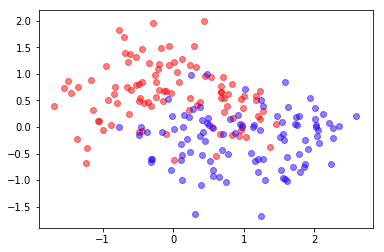

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
print (tf.__version__)
from sklearn.datasets import make_moons
import mlutils
X,y = make_moons(200,noise=.4)
mlutils.plot_2Ddata(X,y)

### Parámetros de entrada

In [ ]:
input_units  = 2
h_units_1    = 4
h_units_2    = 6
output_units = 1

### Grafo computacional

In [ ]:
tf.reset_default_graph()

# symbolic vars for model parameters
tW1 = ...
tb1 = ...
tW2 = ...
tb2 = ...
tW3 = ...
tb3 = ...

# symbolic vars for data
tX = ...
ty = ...


In [ ]:
print tW1.shape
print tW2.shape
print tW3.shape
print tb1.shape
print tb2.shape
print tb3.shape


In [ ]:
y_hat = ...
loss  = ...

### Optimización

In [ ]:
optimizer_gd = tf.train.GradientDescentOptimizer(.5).minimize(loss)

init = tf.global_variables_initializer()

loss_hist = []
steps = 5000

with tf.Session() as sess:
    sess.run(init)
    
    for i in mlutils.pbar()(xrange(1,steps)):
        # parameter update
        sess.run(optimizer_gd, feed_dict={tX: X, ty: y.reshape(-1,1)})
        # history
        if i%10==0:
            loss_val = sess.run(loss, feed_dict={tX: X, ty: y.reshape(-1,1)})
            loss_hist.append(loss_val)
        
    val_W1, val_W2, val_W3, val_b1, val_b2, val_b3 = sess.run([tW1, tW2, tW3, tb1, tb2, tb3])

In [ ]:
plt.plot(loss_hist)

### Predicción

your prediction boundary should look more complex than the single layer neural network seen in the notes. For instance (although not exacly like this):

![AA](Images/lab_lowlevel_01.png)


In [ ]:
def predict(X):
    with tf.Session() as sess:
        preds = sess.run(y_hat, feed_dict={tX: X,  
                                           tW1: val_W1, tW2: val_W2, tW3: val_W3, 
                                           tb1: val_b1, tb2: val_b2, tb3: val_b3})
    return (preds[:,0]>.5).astype(int)

In [ ]:
mlutils.plot_2Ddata_with_boundary(predict, X, y)